# Setup

In [1]:
LOG_PLOT = False
NDAYS=100

In [2]:
%matplotlib notebook
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
import os
from helper import *
from datetime import datetime
from ecdc import ECDC

## ECDC Data

In [3]:
ecdc = ECDC()
df = ecdc.df
print(ecdc.df.dateRep.max())
df.columns


2020-10-29 00:00:00


Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

## DF Subsets

In [4]:
EU = df[df.continentExp=='Europe']
AMERICA = df[(df.continentExp=='America')]


<IPython.core.display.Javascript object>


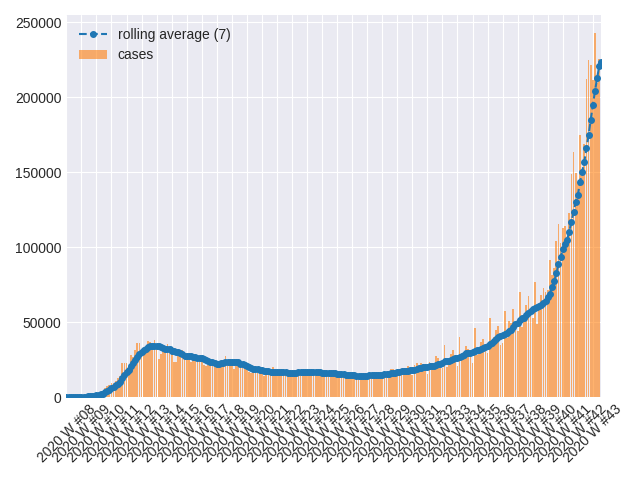

<IPython.core.display.Javascript object>


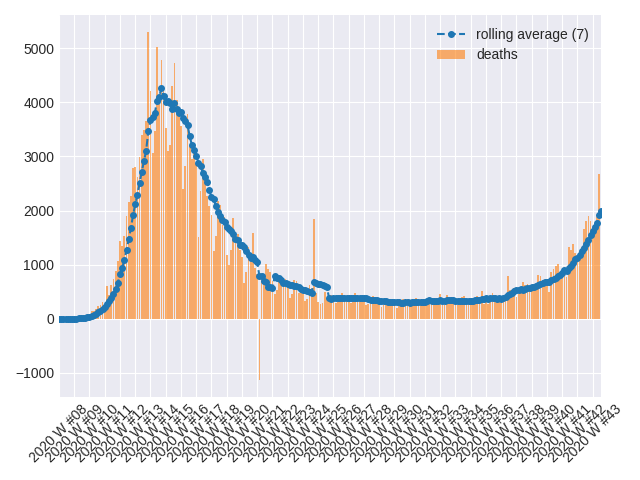

<AxesSubplot:>

In [5]:
ecdc.plot_selection(EU.groupby('dateRep', as_index=False).agg({'cases': sum}), ndays=250, roll_days=7, log=False)
ecdc.plot_selection(EU.groupby('dateRep', as_index=False).agg({'deaths': sum}), column='deaths',ndays=250, roll_days=7, log=False)

# Overview

## Austria, USA, India, ...

<IPython.core.display.Javascript object>


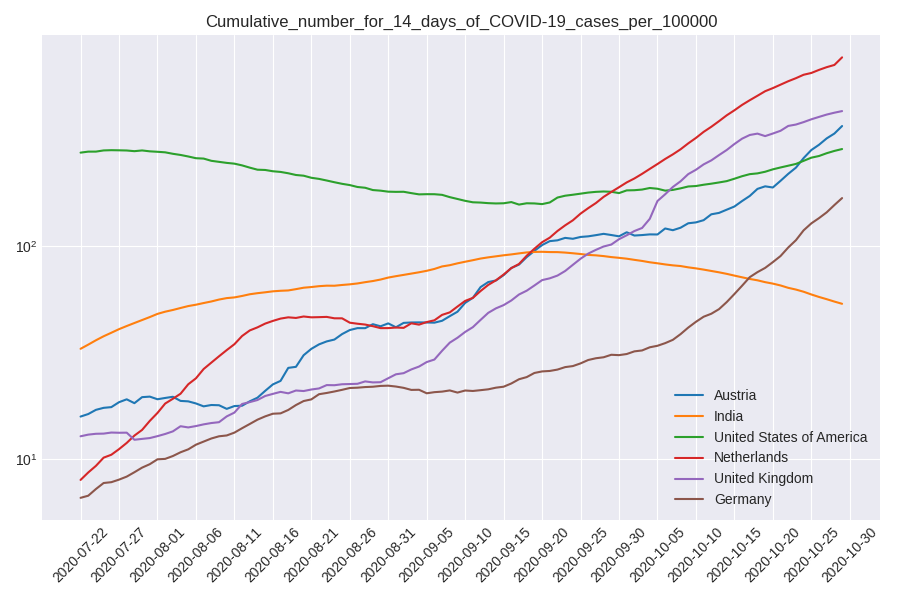

<IPython.core.display.Javascript object>


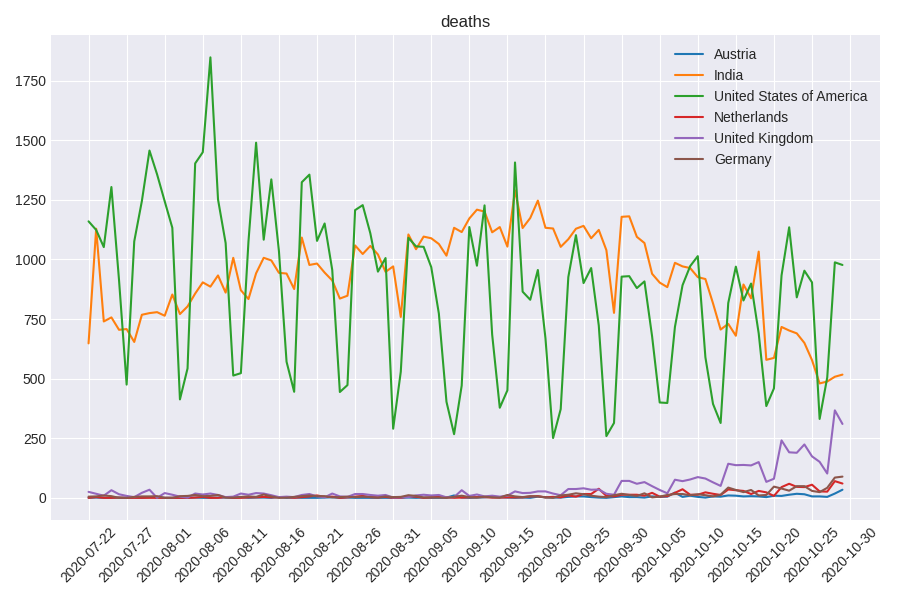

cases                                     \
                           rolling_avg                        last_5_days   
countriesAndTerritories                                                     
United_States_of_America  74534.571429  83056, 59440, 68359, 75129, 78371   
India                     47608.142857  50129, 45148, 36470, 43893, 49881   
United_Kingdom            21863.714286  23012, 19790, 20890, 22885, 24700   
Germany                   12709.142857   11176, 8685, 11409, 14964, 16774   
Netherlands               10925.714286   8639, 10194, 10324, 10283, 17789   
Austria                    3018.000000       2989, 2766, 2512, 2698, 4149   

                                 deaths                              \
                            max     sum last_7_days_sum rolling_avg   
countriesAndTerritories                                               
United_States_of_America  85329  227700            5499  785.571429   
India                     97894  120527            3911  558.714286   
United_Kingdom            26687   45675            1517  216.714286   
Germany                   16774   10272             367   52.428571   
Netherlands               17789    7192             329   47.000000   
Austria                    4149    1040             100   14.285714   

                                                         \
                                      last_5_days   max   
countriesAndTerritories                                   
United_States_of_America  904, 331, 505, 988, 977  4928   
India                     578, 480, 488, 508, 517  2003   
United_Kingdom            174, 151, 102, 367, 310  1224   
Germany                        29, 24, 42, 85, 89   315   
Netherlands                    55, 27, 26, 70, 60   234   
Austria                           6, 6, 4, 18, 34    34   

                         Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  \
                                                                             latest   
countriesAndTerritories                                                               
United_States_of_America                                         286.242608           
India                                                             53.651674           
United_Kingdom                                                   431.573089           
Germany                                                          168.382709           
Netherlands                                                      771.824684           
Austria                                                          367.172662           

                                      
                                 max  
countriesAndTerritories               
United_States_of_America  286.242608  
India                      94.173835  
United_Kingdom            431.573089  
Germany                   168.382709  
Netherlands               771.824684  
Austria                   367.172662

In [18]:
# countries = ['AT', 'IN', 'US', 'UK', 'DE', 'NL', 'FR',  'IT', 'ES','EL' ]
countries = ('AT', 'IN', 'US', 'NL', 'UK', 'DE')
SELECTION =  df[df.geoId.isin(countries)]

ecdc.plot_comparison(countries, log=True, ndays=100)
ecdc.plot_comparison(countries, field='deaths', log=False, ndays=100)

ecdc.overview(SELECTION)


## Sweden and the world

<IPython.core.display.Javascript object>


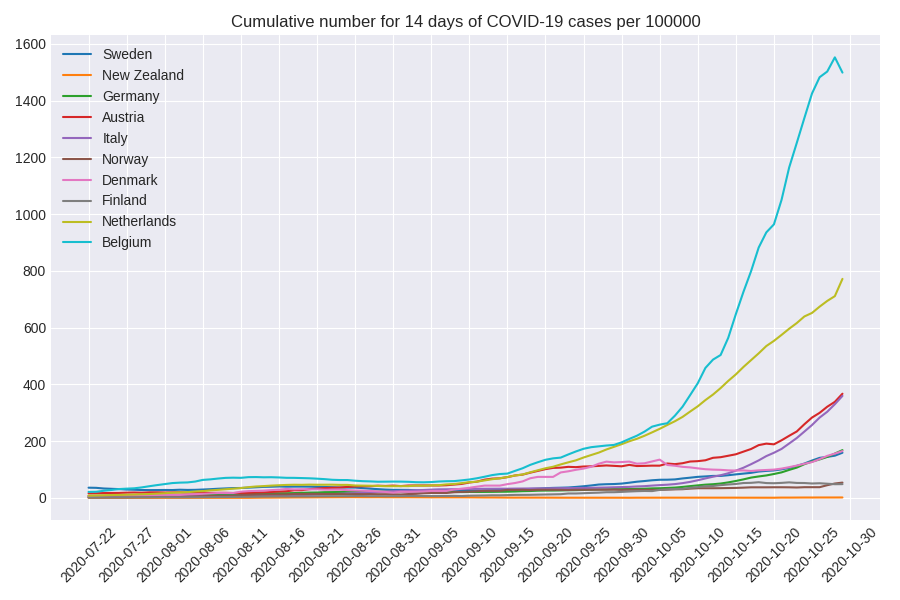

<AxesSubplot:title={'center':'Cumulative number for 14 days of COVID-19 cases per 100000'}>

In [56]:
countries = ('SE', 'NZ','DE','AT','IT','NO','DK','FI','NL', 'BE')
ecdc.plot_comparison(countries, log=False, ndays=100)


### World

In [57]:
ecdc.overview(df).head(5)

cases                                     \
                           rolling_avg                        last_5_days   
countriesAndTerritories                                                     
United_States_of_America  74534.571429  83056, 59440, 68359, 75129, 78371   
India                     47608.142857  50129, 45148, 36470, 43893, 49881   
France                    39673.000000  45422, 52010, 26771, 33417, 36437   
Brazil                    24214.000000  26979, 13493, 15726, 29787, 28629   
United_Kingdom            21863.714286  23012, 19790, 20890, 22885, 24700   

                                 deaths                              \
                            max     sum last_7_days_sum rolling_avg   
countriesAndTerritories                                               
United_States_of_America  85329  227700            5499  785.571429   
India                     97894  120527            3911  558.714286   
France                    52010   35785            1737  248.142857   
Brazil                    69074  158456            3053  436.142857   
United_Kingdom            26687   45675            1517  216.714286   

                                                         \
                                      last_5_days   max   
countriesAndTerritories                                   
United_States_of_America  904, 331, 505, 988, 977  4928   
India                     578, 480, 488, 508, 517  2003   
France                    137, 116, 257, 523, 244  2004   
Brazil                    432, 231, 263, 549, 510  1595   
United_Kingdom            174, 151, 102, 367, 310  1224   

                         Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  \
                                                                             latest   
countriesAndTerritories                                                               
United_States_of_America                                         286.242608           
India                                                             53.651674           
France                                                           680.569138           
Brazil                                                           155.132787           
United_Kingdom                                                   431.573089           

                                      
                                 max  
countriesAndTerritories               
United_States_of_America  286.242608  
India                      94.173835  
France                    680.569138  
Brazil                    304.320523  
United_Kingdom            431.573089

## Fastest growth in number of cases per 100,000 in Europe

<IPython.core.display.Javascript object>


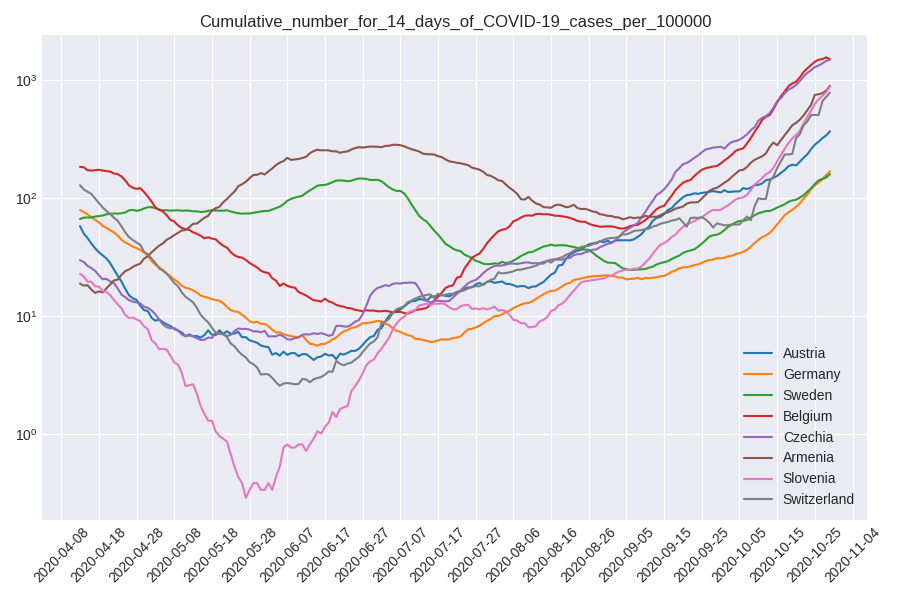

In [19]:
EU_med = EU[EU.popData2019>2000000]
geoIds = EU_med.sort_values(['dateRep', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], ascending=[False,False]).head(5).geoId.to_list()

ecdc.plot_comparison(['AT','DE','SE', *geoIds ], log=True, ndays=200, roll_days=7);

# Austria

## Deaths

In [15]:
help(ecdc.plot_country)
ecdc.df.columns

Help on method plot_country in module ecdc:

plot_country(geoId, ndays=0, **kwargs) method of ecdc.ECDC instance



Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

<IPython.core.display.Javascript object>


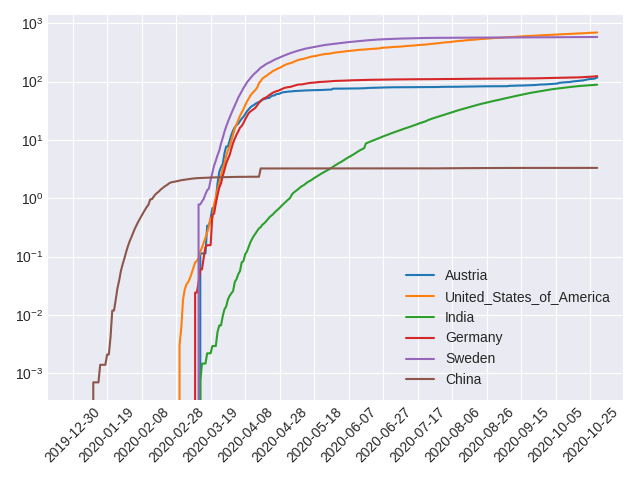

In [24]:
f,ax = plt.subplots()
countries = ('AT', 'US', 'IN', 'DE','SE','CN')
for c in countries:
    df = ecdc.select_country(c)
    popData2019 = df.iloc[0].popData2019
    label = df.iloc[0].countriesAndTerritories
    ax.plot(df.dateRep, df.deaths.cumsum()*1000000/popData2019, label=label)
#     ax.plot(df.dateRep, df.deaths.cumsum(), label=label)

# ax = ecdc.plot_country('AT', column='deaths', log=True, ndays=250, roll_days=7);
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.yscale('log')
pretty_plot(ax)

In [26]:
ecdc.df.deaths.cumsum()

0              0
1              7
2             15
3             18
4             22
          ...   
52101    1175278
52102    1175279
52103    1175279
52104    1175279
52105    1175279
Name: deaths, Length: 52106, dtype: int64

# India

<IPython.core.display.Javascript object>


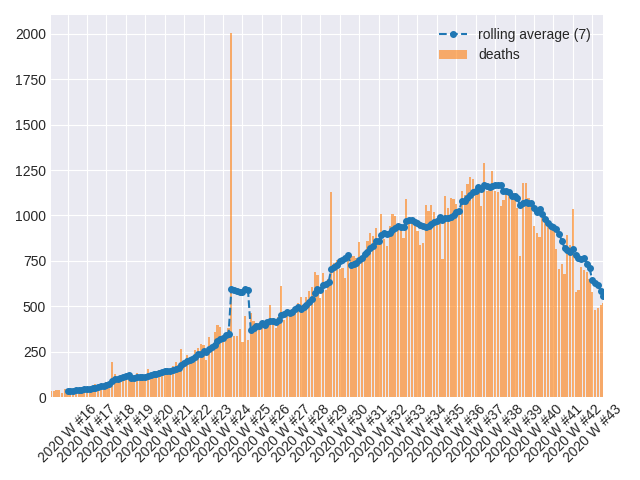

In [14]:
ecdc.plot_country('IN', column='deaths', log=LOG_PLOT,ndays=200, roll_days=7);

# USA

<IPython.core.display.Javascript object>


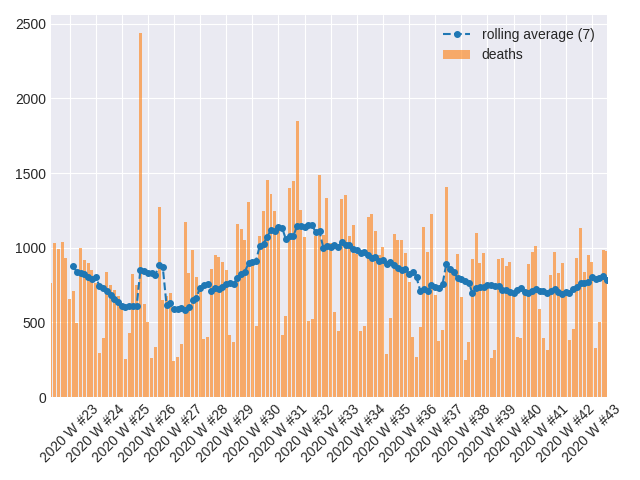

In [16]:
ecdc.plot_country('US', column='deaths', log=LOG_PLOT,ndays=150, roll_days=7);


# Germany

<IPython.core.display.Javascript object>


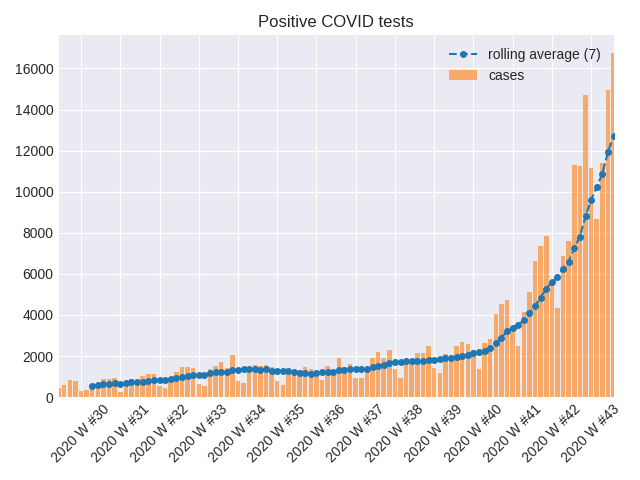

In [62]:
ecdc.plot_country('DE', log=LOG_PLOT,ndays=NDAYS, roll_days=7);

## UK

<IPython.core.display.Javascript object>


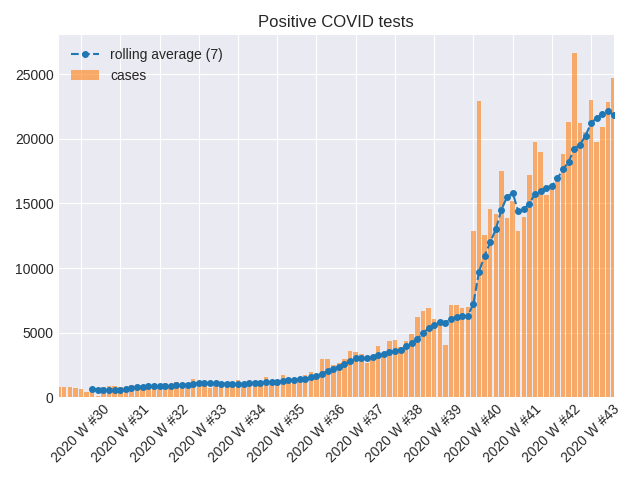

In [63]:
ecdc.plot_country('UK', log=LOG_PLOT,ndays=NDAYS,roll_days=7);

# Commit and Push

In [13]:
%cd Documents/code/covid19/
now = datetime.now()
commit_message = "Last run on " + now.strftime('%Y-%m-%d %H:%M')
commit_message
! echo $commit_message > commit_message.txt
! git add .
! git commit -F commit_message.txt
! git push


[Errno 2] No such file or directory: 'Documents/code/covid19/'
/home/gythaogg/Documents/code/covid19/notebooks
[feature/angular b8a5028] Last run on 2020-10-29 15:38
 4 files changed, 4121 insertions(+), 230 deletions(-)
Enumerating objects: 13, done.
Counting objects: 100% (13/13), done.
Delta compression using up to 16 threads
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 731.06 KiB | 9.25 MiB/s, done.
Total 7 (delta 6), reused 0 (delta 0)
remote: Resolving deltas: 100% (6/6), completed with 6 local objects.
To github.com:gythaogg/covid19.git
   f088be6..b8a5028  feature/angular -> feature/angular


In [41]:
! git push --set-upstream origin feature/angular


Branch 'feature/angular' set up to track remote branch 'feature/angular' from 'origin'.
Everything up-to-date
